<a href="https://colab.research.google.com/github/indrap23/PJJDA/blob/main/Regression_and_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresi

Regresi adalah metode statistik untuk mengukur hubungan antara Sebab (Variabel Independen/X) dan Akibat (Variabel Dependen/Y).

Bayangkan Anda punya usaha Es Jeruk. Anda mencatat data penjualan selama 5 hari terakhir dan suhu udaranya.
- Hari 1: Suhu 28°C $\rightarrow$ Laku 20 gelas.
- Hari 2: Suhu 30°C $\rightarrow$ Laku 25 gelas.
- Hari 3: Suhu 32°C $\rightarrow$ Laku 35 gelas.
- ... dan seterusnya.


Secara naluri, Anda sadar: "Makin panas cuaca, makin laku es jeruk saya."

Regresi Linear adalah cara matematika untuk mengubah naluri "makin panas makin laku" itu menjadi angka pasti. Kita ingin tahu: "Setiap suhu naik 1 derajat, nambah laku berapa gelas?"



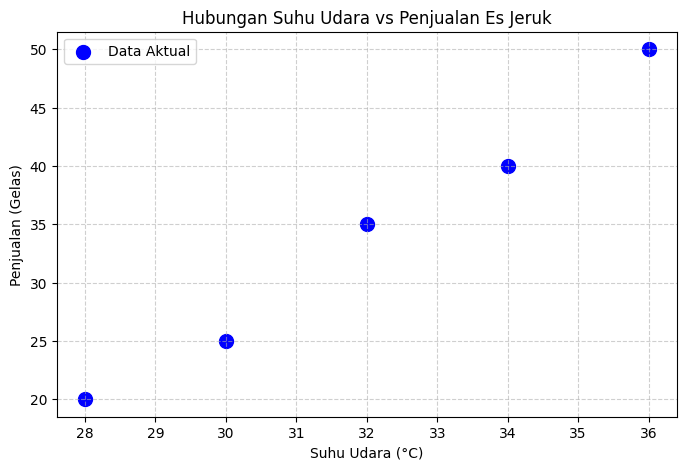

In [ ]:
import matplotlib.pyplot as plt

# Data Es Jeruk
suhu = [28, 30, 32, 34, 36]      # X (Penyebab)
jualan = [20, 25, 35, 40, 50]    # Y (Akibat)

# Membuat Plot
plt.figure(figsize=(8, 5))

# Perintah utama: scatter() -> Hanya membuat titik
plt.scatter(suhu, jualan, color='blue', s=100, label='Data Aktual')

# Mempercantik grafik
plt.title('Hubungan Suhu Udara vs Penjualan Es Jeruk')
plt.xlabel('Suhu Udara (°C)')
plt.ylabel('Penjualan (Gelas)')
plt.grid(True, linestyle='--', alpha=0.6) # Grid bantu
plt.legend()

plt.show()

Kalau data tadi kita gambar di kertas (Grafik), titik-titiknya pasti berantakan (tidak membentuk garis lurus sempurna).

Tugas Regresi Linear adalah menarik satu garis lurus yang membelah titik-titik itu seadil mungkin.

Garis ini yang akan kita pakai untuk meramal masa depan.Rumus garis lurus itu selalu begini:

$$Y = \text{Intercept} + (\text{Slope} \times X)$$

Mari kita terjemahkan ke bahasa "Es Jeruk":

$$\text{Penjualan} = \text{Jualan Dasar} + (\text{Efek Panas} \times \text{Suhu})$$


Ada dua tokoh utama di sini yang harus dicari komputer:

Slope (Kemiringan): Ini "Efek Panas". Kalau suhu naik 1 derajat, penjualan naik berapa?

Intercept (Titik Awal): Ini "Jualan Dasar". Kalau suhu 0 derajat (beku), kira-kira ada yang beli nggak? (Biasanya ini angka basis).

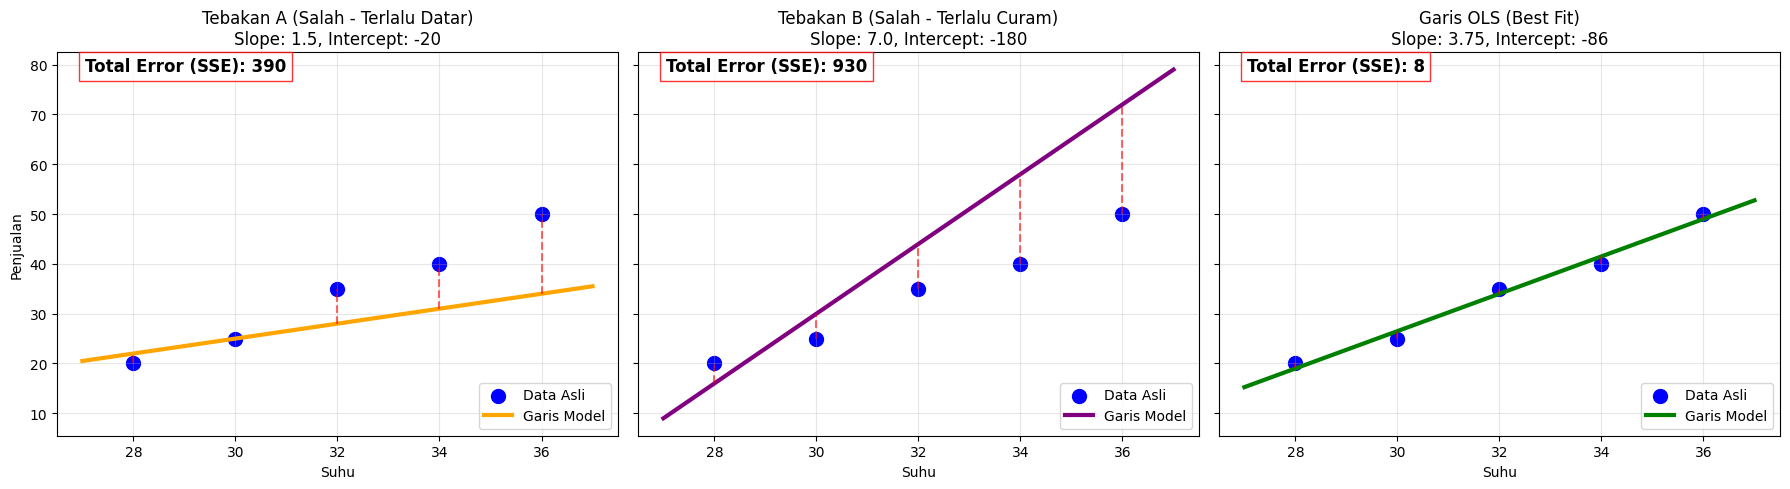

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. DATA ES JERUK ---
X = np.array([28, 30, 32, 34, 36]) # Suhu
y = np.array([20, 25, 35, 40, 50]) # Jualan

# --- 2. DEFINISI 3 JENIS GARIS ---
# Kita buat dictionary untuk menyimpan parameter garisnya
garis_garis = [
    # Garis 1: Ngawur (Terlalu Landai/Datar)
    {"label": "Tebakan A (Salah - Terlalu Datar)", "beta0": -20, "beta1": 1.5, "color": "orange"},

    # Garis 2: Ngawur (Terlalu Curam/Nanjak)
    {"label": "Tebakan B (Salah - Terlalu Curam)", "beta0": -180, "beta1": 7.0, "color": "purple"},

    # Garis 3: OLS (Hasil Hitungan Kita Tadi)
    {"label": "Garis OLS (Best Fit)", "beta0": -86, "beta1": 3.75, "color": "green"}
]

# Siapkan Canvas (3 Gambar Jejer ke Samping)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Loop untuk menggambar masing-masing garis
for i, garis in enumerate(garis_garis):
    ax = axes[i]
    b0 = garis["beta0"]
    b1 = garis["beta1"]

    # A. Gambar Titik Data Asli
    ax.scatter(X, y, color='blue', s=100, label='Data Asli')

    # B. Hitung Prediksi & Error untuk garis ini
    y_pred = b0 + (b1 * X)
    error = y - y_pred
    sse = np.sum(error ** 2) # Total Kuadrat Error

    # C. Gambar Garis Modelnya
    x_range = np.array([27, 37])
    y_range = b0 + (b1 * x_range)
    ax.plot(x_range, y_range, color=garis["color"], linewidth=3, label='Garis Model')

    # D. VISUALISASI ERROR (Garis Merah Putus-putus)
    # Ini yang Anda minta: Memperlihatkan garis errornya
    for j in range(len(X)):
        ax.vlines(x=X[j], ymin=min(y[j], y_pred[j]), ymax=max(y[j], y_pred[j]),
                  colors='red', linestyles='dashed', alpha=0.6)

    # Kosmetik Grafik
    ax.set_title(f"{garis['label']}\nSlope: {b1}, Intercept: {b0}")
    ax.set_xlabel('Suhu')
    if i == 0: ax.set_ylabel('Penjualan')

    # Tampilkan Skor SSE di dalam grafik
    ax.text(0.05, 0.95, f"Total Error (SSE): {sse:.0f}",
            transform=ax.transAxes, fontsize=12, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

    ax.grid(True, alpha=0.3)
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

$Y = \beta_0 + \beta_1 X$

Data Kita ($n=5$):

X (Suhu): 28, 30, 32, 34, 36Y

(Jualan): 20, 25, 35, 40, 50

Garis regresi WAJIB melewati rata-rata.
Ini hukum alamnya.

Rata-rata Suhu ($\bar{X}$) = $\frac{28+30+32+34+36}{5} = \mathbf{32}$

Rata-rata Jualan ($\bar{Y}$) = $\frac{20+25+35+40+50}{5} = \mathbf{34}$Titik

pusat kita adalah (32, 34).

In [ ]:
# 1. DATA
X = [28, 30, 32, 34, 36]
Y = [20, 25, 35, 40, 50]
n = len(X)
mean_x = sum(X) / n
mean_y = sum(Y) / n

print(f"Rata-rata X: {mean_x}")
print(f"Rata-rata Y: {mean_y}")

Rata-rata X: 32.0
Rata-rata Y: 34.0


## Cari Kemiringan / Slope ($\beta_1$)

Rumus Slope itu logikanya begini:
$$\text{Slope} = \frac{\text{Seberapa kompak X dan Y bergerak bareng?}}{\text{Seberapa liar X bergerak sendirian?}}$$

Rumus Matematikanya:

$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

<h3>Tabel Perhitungan Manual Slope (Es Jeruk)</h3>
    <table class="tabel-regresi">
        <thead>
            <tr>
                <th>Data X<br>(Suhu)</th>
                <th>Data Y<br>(Jualan)</th>
                <th>A. Selisih X<br>(X - 32)</th>
                <th>B. Selisih Y<br>(Y - 34)</th>
                <th>C. Atas<br>(A dikali B)</th>
                <th>D. Bawah<br>(A dikuadratkan)</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>28</td>
                <td>20</td>
                <td>-4</td>
                <td>-14</td>
                <td>56</td>
                <td>16</td>
            </tr>
            <tr>
                <td>30</td>
                <td>25</td>
                <td>-2</td>
                <td>-9</td>
                <td>18</td>
                <td>4</td>
            </tr>
            <tr>
                <td>32</td>
                <td>35</td>
                <td>0</td>
                <td>1</td>
                <td>0</td>
                <td>0</td>
            </tr>
            <tr>
                <td>34</td>
                <td>40</td>
                <td>2</td>
                <td>6</td>
                <td>12</td>
                <td>4</td>
            </tr>
            <tr>
                <td>36</td>
                <td>50</td>
                <td>4</td>
                <td>16</td>
                <td>64</td>
                <td>16</td>
            </tr>
        </tbody>
        <tfoot>
            <tr>
                <td colspan="4" style="text-align: right; padding-right: 20px;">TOTAL (Jumlahkan)</td>
                <td class="highlight">150</td>
                <td class="highlight">40</td>
            </tr>
        </tfoot>
    </table>

$$\beta_1 = \frac{150}{40} = \mathbf{3.75}$$

#### Cari Intercept ($\beta_0$)

$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$


Kita sudah punya kemiringan (3.75). Kita juga tahu garis ini harus lewat titik pusat (32, 34).Kita tinggal pakai aljabar anak SMP:$$Y = \beta_0 + \beta_1 X$$$$34 = \beta_0 + (3.75 \times 32)$$$$34 = \beta_0 + 120$$Pindah ruas angka 120-nya:$$\beta_0 = 34 - 120$$$$\beta_0 = \mathbf{-86}$$

In [ ]:
pembilang = 0 # Bagian atas rumus (Sigma (x-mean)(y-mean))
penyebut = 0  # Bagian bawah rumus (Sigma (x-mean)^2)

print("\n--- Rincian Hitungan ---")
for i in range(n):
    selisih_x = X[i] - mean_x
    selisih_y = Y[i] - mean_y

    # Bagian Atas: Perkalian silang
    kali = selisih_x * selisih_y
    pembilang += kali

    # Bagian Bawah: Kuadrat selisih X
    kuadrat_x = selisih_x ** 2
    penyebut += kuadrat_x

    print(f"Data ke-{i+1}: Atas tambah {kali}, Bawah tambah {kuadrat_x}")

print("-" * 30)
print(f"Total Atas   : {pembilang}")
print(f"Total Bawah  : {penyebut}")


#HASIL AKHIR
beta_1 = pembilang / penyebut          # Slope
beta_0 = mean_y - (beta_1 * mean_x)    # Intercept

print("\n--- HASIL FINAL ---")
print(f"Slope (b1)     : {beta_1}")
print(f"Intercept (b0) : {beta_0}")
print(f"Rumus          : Y = {beta_0} + {beta_1}X")


--- Rincian Hitungan ---
Data ke-1: Atas tambah 56.0, Bawah tambah 16.0
Data ke-2: Atas tambah 18.0, Bawah tambah 4.0
Data ke-3: Atas tambah 0.0, Bawah tambah 0.0
Data ke-4: Atas tambah 12.0, Bawah tambah 4.0
Data ke-5: Atas tambah 64.0, Bawah tambah 16.0
------------------------------
Total Atas   : 150.0
Total Bawah  : 40.0

--- HASIL FINAL ---
Slope (b1)     : 3.75
Intercept (b0) : -86.0
Rumus          : Y = -86.0 + 3.75X


Kita sudah punya rumus: $Y = -86 + 3.75 X$.
Tapi kenapa komputer yakin sekali ini rumus terbaik? Kenapa bukan $3.80 X$ atau $3.50 X$?

Jawabannya ada di dua konsep ini: Error (Residu) dan OLS.

 Apa itu Error (Residu)?

 Di dunia nyata, ramalan tidak mungkin 100% tepat.Kenyataan
 ($y$): Apa yang benar-benar terjadi di warung.Prediksi
 ($\hat{y}$): Apa kata rumus matematika kita.

 Error adalah selisih antara Kenyataan dengan Prediksi.

 $$Error = \text{Kenyataan} - \text{Prediksi}$$

 Mari kita ambil contoh Hari ke-3 dari data Es Jeruk kita:

 Suhu ($X$): 32°C.

 Kenyataan Jualan ($y$): 35 gelas.

 Prediksi Rumus: $-86 + (3.75 \times 32) = 34$ gelas.

 Maka:$$Error = 35 - 34 = \mathbf{1}$$(Artinya: Rumus kita meleset, kurang 1 gelas dibanding kenyataan).

 Apa itu OLS (Ordinary Least Squares)?

 Sekarang bayangkan kita hitung error untuk semua hari (Hari 1 s.d. 5).
 Ada error yang Positif (Kenyataan > Prediksi) dan ada error Negatif (Kenyataan < Prediksi).Jika kita cuma menjumlahkan errornya:

 $$+1 + (-1) = 0$$

 Hasilnya nol!

 Komputer akan tertipu dan mengira garisnya sempurna, padahal salah semua tapi saling menghilangkan.

 Solusi OLS:Komputer melakukan strategi "Kuadratkan Dulu, Baru Jumlahkan".

 - Square (Kuadrat): Setiap error dikuadratkan supaya negatifnya hilang.  ($(-2)^2 = 4$).
 - Least (Terkecil): Cari garis yang total hasil kuadratnya paling kecil.

 Jadi, OLS (Ordinary Least Squares) artinya: Metode mencari garis dengan Total Kuadrat Error Terkecil.

 $$e_i^2 = (y_i - \hat{y}_i)^2$$

 $$SSE = \sum (y_i - \hat{y}_i)^2$$

Total Kesalahan Garis OLS    : 7.5 (Pemenang!)
Total Kesalahan Garis Ngawur : 150.0


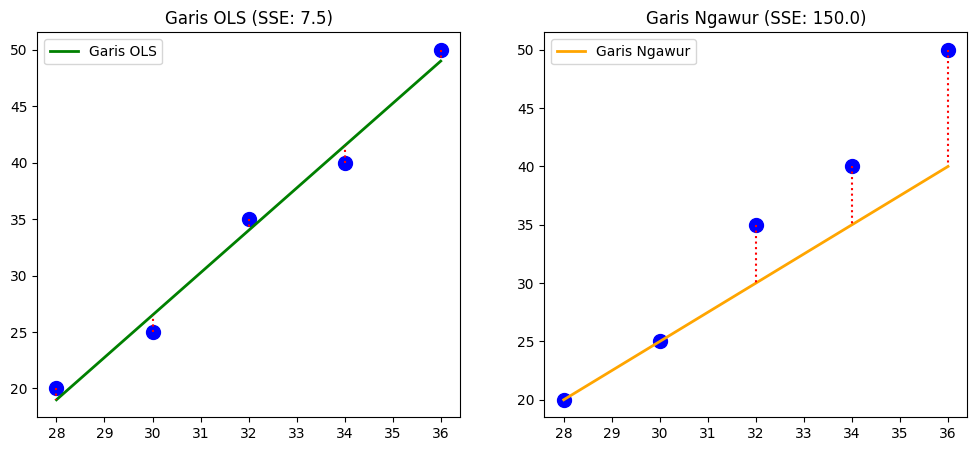

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. DATA ES JERUK ---
data = {
    'Suhu': [28, 30, 32, 34, 36],
    'Jualan_Asli': [20, 25, 35, 40, 50]
}
df = pd.DataFrame(data)

# --- 2. DUA KANDIDAT GARIS ---
# Garis A: OLS (Hasil Hitungan Kita)
def rumus_ols(x): return -86 + (3.75 * x)

# Garis B: Ngawur (Tebakan Asal)
def rumus_ngawur(x): return -50 + (2.5 * x)

# --- 3. HITUNG ERROR MASING-MASING ---
# Hitung Prediksi
df['Prediksi_OLS'] = df['Suhu'].apply(rumus_ols)
df['Prediksi_Ngawur'] = df['Suhu'].apply(rumus_ngawur)

# Hitung Error Kuadrat (Squared Error)
df['Error_Sq_OLS'] = (df['Jualan_Asli'] - df['Prediksi_OLS'])**2
df['Error_Sq_Ngawur'] = (df['Jualan_Asli'] - df['Prediksi_Ngawur'])**2

# Hitung Total (SSE)
sse_ols = df['Error_Sq_OLS'].sum()
sse_ngawur = df['Error_Sq_Ngawur'].sum()

print(f"Total Kesalahan Garis OLS    : {sse_ols} (Pemenang!)")
print(f"Total Kesalahan Garis Ngawur : {sse_ngawur}")

# --- 4. VISUALISASI ---
plt.figure(figsize=(12, 5))

# Plot 1: Garis OLS
plt.subplot(1, 2, 1)
plt.scatter(df['Suhu'], df['Jualan_Asli'], color='blue', s=100)
plt.plot(df['Suhu'], df['Prediksi_OLS'], color='green', linewidth=2, label='Garis OLS')
# Gambar Garis Error (Merah Putus-putus)
plt.vlines(df['Suhu'], df['Jualan_Asli'], df['Prediksi_OLS'], colors='red', linestyles='dotted')
plt.title(f'Garis OLS (SSE: {sse_ols})')
plt.legend()

# Plot 2: Garis Ngawur
plt.subplot(1, 2, 2)
plt.scatter(df['Suhu'], df['Jualan_Asli'], color='blue', s=100)
plt.plot(df['Suhu'], df['Prediksi_Ngawur'], color='orange', linewidth=2, label='Garis Ngawur')
# Gambar Garis Error (Merah Putus-putus)
plt.vlines(df['Suhu'], df['Jualan_Asli'], df['Prediksi_Ngawur'], colors='red', linestyles='dotted')
plt.title(f'Garis Ngawur (SSE: {sse_ngawur})')
plt.legend()

plt.show()

$$Y = \beta_0 + \beta_1 X + \epsilon$$


$$Y = \underbrace{\beta_0 + \beta_1 X}_{\text{Sinyal (Pola)}} + \underbrace{\epsilon}_{\text{Noise (Kekacauan)}}$$

$Y$ (Dependen): Kenyataan penjualan yang terjadi. (Misal: 35 gelas).

$X$ (Independen): Data yang kita tahu. (Misal: Suhu 32°C).

$\beta_0 + \beta_1 X$ (Komponen Deterministik): Ini adalah bagian yang bisa dijelaskan oleh matematika. Ini adalah Garis Lurus yang kita hitung tadi.

$\epsilon$ (Error Term / Epsilon): Ini adalah bagian yang TIDAK bisa dijelaskan oleh suhu.

## Evaluation Metrics

MAE (Mean Absolute Error)$$MAE = \frac{1}{n} \sum |y - \hat{y}|$$
MSE (Mean Squared Error)$$MSE = \frac{1}{n} \sum (y - \hat{y})^2$$
RMSE (Root Mean Squared Error)$$RMSE = \sqrt{MSE}$$

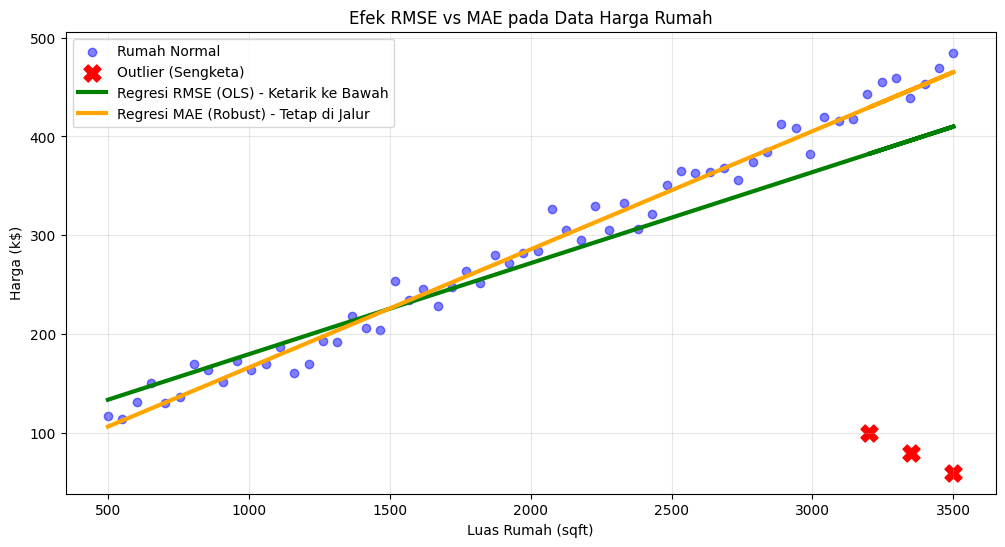


--- HASIL EVALUASI ---
[MODEL RMSE (OLS)] MAE: 39.36 | RMSE: 76.00
[MODEL MAE (ROBUST)] MAE: 27.91 | RMSE: 81.50


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, QuantileRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Bikin Data Sintetis (60 Rumah Normal)
np.random.seed(42)
luas = np.linspace(500, 3500, 60).reshape(-1, 1)
# Harga = 50 + 0.12 * Luas + Noise
harga = 50 + 0.12 * luas.flatten() + np.random.normal(0, 15, 60)

# 2. Tambah 3 Outlier (Rumah Luas tapi Harga Hancur/Sengketa)
luas_outlier = np.array([[3200], [3350], [3500]])
harga_outlier = np.array([100, 80, 60]) # Harganya jauh di bawah pasar

X_full = np.vstack([luas, luas_outlier])
y_full = np.concatenate([harga, harga_outlier])

# 3. Model A: OLS (Meminimalkan RMSE)
model_rmse = LinearRegression()
model_rmse.fit(X_full, y_full)
pred_rmse = model_rmse.predict(X_full)

# 4. Model B: Robust (Meminimalkan MAE)
# QuantileRegressor dengan quantile=0.5 adalah regresi berbasis MAE
model_mae = QuantileRegressor(quantile=0.5, alpha=0)
model_mae.fit(X_full, y_full)
pred_mae = model_mae.predict(X_full)

# 5. Visualisasi
plt.figure(figsize=(12, 6))
plt.scatter(luas, harga, color='blue', alpha=0.5, label='Rumah Normal')
plt.scatter(luas_outlier, harga_outlier, color='red', marker='X', s=150, label='Outlier (Sengketa)')

# Gambar Garis Hasil Prediksi
plt.plot(X_full, pred_rmse, color='green', linewidth=3, label='Regresi RMSE (OLS) - Ketarik ke Bawah')
plt.plot(X_full, pred_mae, color='orange', linewidth=3, label='Regresi MAE (Robust) - Tetap di Jalur')

plt.title('Efek RMSE vs MAE pada Data Harga Rumah')
plt.xlabel('Luas Rumah (sqft)')
plt.ylabel('Harga (k$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. Perbandingan Skor
def cetak_skor(y_true, y_pred, nama):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"[{nama}] MAE: {mae:.2f} | RMSE: {rmse:.2f}")

print("\n--- HASIL EVALUASI ---")
cetak_skor(y_full, pred_rmse, "MODEL RMSE (OLS)")
cetak_skor(y_full, pred_mae, "MODEL MAE (ROBUST)")

Skenario DataAda 3 titik data:

$(X=1, Y=2)$

$(X=2, Y=4)$

$(X=3, Y=15)$ $\rightarrow$ Ini Outlier (seharusnya sekitar 6, tapi melonjak ke 15).

Garis A: Setia pada Data Normal ($Y = 2X$)

Prediksi untuk $X=1$ adalah 2 $\rightarrow$ Error = $2 - 2 = 0$

Prediksi untuk $X=2$ adalah 4 $\rightarrow$ Error = $4 - 4 = 0$

Prediksi untuk $X=3$ adalah 6 $\rightarrow$ Error = $15 - 6 = \mathbf{9}$ (Meleset jauh di outlier)

<br>

Garis B: Kompromi dengan Outlier ($Y = 3X$)

Prediksi untuk $X=1$ adalah 3 $\rightarrow$ Error = $2 - 3 = -1$

Prediksi untuk $X=2$ adalah 6 $\rightarrow$ Error = $4 - 6 = -2$

Prediksi untuk $X=3$ adalah 9 $\rightarrow$ Error = $15 - 9 = \mathbf{6}$ (Melesetnya berkurang)

<br>

MAE Garis A: $\frac{|0| + |0| + |9|}{3} = \frac{9}{3} = \mathbf{3}$

MAE Garis B: $\frac{|-1| + |-2| + |6|}{3} = \frac{9}{3} = \mathbf{3}$

<br>

RMSE Garis A:
- Kuadratkan error: $0^2, 0^2, 9^2 \rightarrow 0, 0, \mathbf{81}$
- Rata-rata: $81 / 3 = 27$
- Akar: $\sqrt{27} \approx \mathbf{5.19}$


RMSE Garis B:
- Kuadratkan error: $(-1)^2, (-2)^2, 6^2 \rightarrow 1, 4, \mathbf{36}$
- Rata-rata: $(1+4+36) / 3 = 13.6$
- Akar: $\sqrt{13.6} \approx \mathbf{3.69}$

RMSE lebih memprioritaskan pengurangan kesalahan besar daripada mempertahankan akurasi pada data normal.

Garis A (y=2x): MAE = 3.00, RMSE = 5.20
Garis B (y=3x): MAE = 3.00, RMSE = 3.70


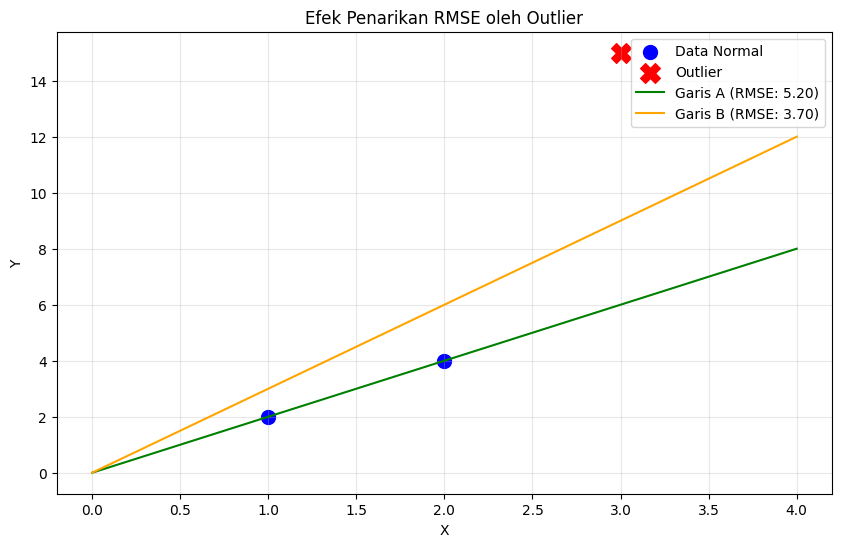

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Data (Outlier pada y=15)
X = np.array([1, 2, 3])
Y = np.array([2, 4, 15])

# 2. Dua Model Kandidat
# Garis A: y = 2x (Mengikuti pola data normal)
y_a = 2 * X
# Garis B: y = 3x (Mencoba mendekat ke outlier)
y_b = 3 * X

# 3. Perhitungan Metrik
def get_scores(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return mae, rmse

mae_a, rmse_a = get_scores(Y, y_a)
mae_b, rmse_b = get_scores(Y, y_b)

print(f"Garis A (y=2x): MAE = {mae_a:.2f}, RMSE = {rmse_a:.2f}")
print(f"Garis B (y=3x): MAE = {mae_b:.2f}, RMSE = {rmse_b:.2f}")

# 4. Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(X[:2], Y[:2], color='blue', s=100, label='Data Normal')
plt.scatter(X[2], Y[2], color='red', marker='X', s=200, label='Outlier')

# Plot Garis
x_range = np.linspace(0, 4, 100)
plt.plot(x_range, 2*x_range, color='green', label=f'Garis A (RMSE: {rmse_a:.2f})')
plt.plot(x_range, 3*x_range, color='orange', label=f'Garis B (RMSE: {rmse_b:.2f})')

plt.title('Efek Penarikan RMSE oleh Outlier')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)

##Multiple Linear Regression (Banyak Fitur).

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon$$

Rumus OLS:
$$\hat{\beta} = (X^T X)^{-1} X^T y$$

$X^T$: Transpose dari matriks fitur.

$(X^T X)^{-1}$: Inverse dari perkalian matriks.


Bahaya Baru: Multikolinearitas


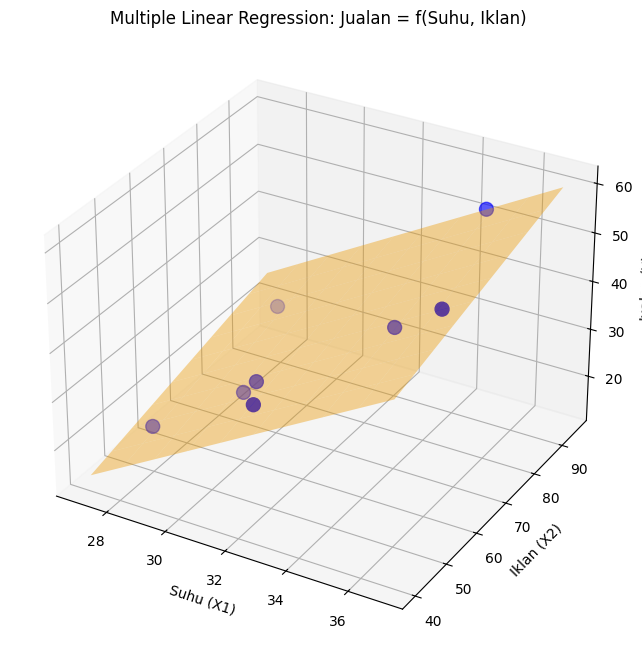

Persamaan: Y = -87.98 + 3.45*Suhu + 0.21*Iklan


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Data Es Jeruk dengan 2 Fitur
data = {
    'Suhu': [28, 30, 32, 34, 36, 29, 31, 35],
    'Iklan': [50, 60, 45, 70, 65, 80, 55, 90],
    'Jualan': [20, 25, 35, 40, 50, 30, 32, 55]
}
df = pd.DataFrame(data)

X = df[['Suhu', 'Iklan']]
y = df['Jualan']

# 2. Training Model
model = LinearRegression()
model.fit(X, y)

# 3. Membuat Meshgrid untuk menggambar Bidang (Plane)
x_range = np.linspace(df['Suhu'].min()-1, df['Suhu'].max()+1, 10)
z_range = np.linspace(df['Iklan'].min()-5, df['Iklan'].max()+5, 10)
x_mesh, z_mesh = np.meshgrid(x_range, z_range)

# Hitung prediksi Y untuk setiap titik di meshgrid
y_pred_mesh = model.intercept_ + model.coef_[0] * x_mesh + model.coef_[1] * z_mesh

# 4. Plotting 3D
fig = plt.subplots(figsize=(10, 8), subplot_kw={'projection': '3d'})
ax = fig[1]

# Plot titik data asli
ax.scatter(df['Suhu'], df['Iklan'], df['Jualan'], color='blue', s=100, label='Data Asli')

# Plot Bidang Regresi (The Plane)
surface = ax.plot_surface(x_mesh, z_mesh, y_pred_mesh, color='orange', alpha=0.4, label='Regression Plane')

# Labeling
ax.set_xlabel('Suhu (X1)')
ax.set_ylabel('Iklan (X2)')
ax.set_zlabel('Jualan (Y)')
ax.set_title('Multiple Linear Regression: Jualan = f(Suhu, Iklan)')

plt.show()

print(f"Persamaan: Y = {model.intercept_:.2f} + {model.coef_[0]:.2f}*Suhu + {model.coef_[1]:.2f}*Iklan")

1. Uji Asumsi Klasik (The Medical Check-up)

Regresi OLS memiliki syarat agar hasilnya dianggap BLUE (Best Linear Unbiased Estimator). Jika syarat ini dilanggar, hasil prediksi Anda bisa menipu.- - Linearitas: Apakah hubungan $X$ dan $Y$ benar-benar garis lurus? Jika melengkung, Anda butuh Polynomial Regression.
$$Y = \beta_0 + \beta_1 X + \gamma_1 \hat{Y}^2 + \gamma_2 \hat{Y}^3 + ... + \epsilon$$

Logikanya: Jika koefisien $\gamma$ signifikan (tidak nol), berarti ada pola melengkung yang tidak tertangkap oleh garis lurus kita.

- Homoskedastisitas: Variansi error harus konstan. Jangan sampai di suhu rendah tebakannya jitu, tapi di suhu tinggi tebakannya ngawur parah.

Kita ingin error ($\epsilon$) memiliki varians yang konstan. Jika error membesar saat $X$ membesar, itu disebut Heteroskedastisitas.

Rumus Uji Breusch-Pagan:
Kita meregresikan kuadrat error ($e^2$) terhadap variabel $X$:$

$e^2 = \alpha_0 + \alpha_1 X_1 + \alpha_2 X_2 + ... + u$$

Statistik Uji: $LM = n \times R^2$ (mengikuti distribusi Chi-Square).

Interpretasi: Jika $R^2$ tinggi (artinya $X$ bisa menjelaskan besarnya error), maka asumsi Homoskedastisitas gagal.


- Normalitas Residual: Errornya harus berdistribusi normal (seperti lonceng)

Rumus Jarque-Bera melihat Skewness (kemiringan) dan Kurtosis (keruncingan) dari distribusi error.

Rumus Jarque-Bera (JB):

$$JB = \frac{n}{6} \left( S^2 + \frac{1}{4}(K - 3)^2 \right)$$

$S$ (Skewness): Harus mendekati 0.

$K$ (Kurtosis): Harus mendekati 3 (Mesokurtik).

Interpretasi: Jika nilai $JB$ terlalu besar, berarti error tidak normal.
- Autokorelasi: Error hari ini tidak boleh tergantung pada error kemarin

Khusus untuk data yang punya urutan waktu (Time Series). Error hari ini tidak boleh punya hubungan dengan error kemarin.
Rumus Durbin-Watson ($d$):
$$d = \frac{\sum_{t=2}^{n} (e_t - e_{t-1})^2}{\sum_{t=1}^{n} e_t^2}$$

Nilai $d \approx 2$: Aman (Tidak ada autokorelasi).

Nilai $d < 2$: Ada autokorelasi positif.

Nilai $d > 2$: Ada autokorelasi negatif.


2. Regularisasi: Ridge & Lasso (Anti Overfitting)

Saat Anda punya terlalu banyak fitur (misal 100 variabel untuk memprediksi harga rumah), model cenderung menjadi "terlalu pintar" menghafal data latihan tapi gagal saat mencoba data baru (Overfitting).

Ridge Regression ($L_2$): Mengecilkan koefisien $\beta$ agar tidak terlalu ekstrem. Cocok untuk melawan Multikolinearitas.

Lasso Regression ($L_1$): Bisa membuat koefisien variabel yang tidak penting menjadi nol. Jadi, Lasso bertugas sekaligus sebagai "tukang seleksi" fitur otomatis.

3. Logit & Probit (Regresi untuk Klasifikasi)
Sampai titik ini, kita memprediksi angka kontinu (Jualan 10, 20, 30). Bagaimana jika Anda ingin memprediksi Kategori (Ya/Tidak)?

Contoh: Apakah pelanggan akan Beli atau Tidak Beli?

Kita tidak bisa pakai regresi linear biasa karena hasilnya bisa di atas 1 atau di bawah 0 (tidak masuk akal untuk probabilitas).

Solusinya adalah Logistic Regression, yang menggunakan fungsi Sigmoid untuk mengunci hasil di antara 0 dan 1.

4. Transformasi Variabel
Terkadang data asli tidak "berteman" dengan regresi linear. Anda perlu melakukan trik matematika:

Log Transformation: Untuk menangani data yang skalanya sangat jomplang (seperti data pendapatan).

Dummy Variables: Bagaimana memasukkan data teks (seperti "Jenis Kelamin" atau "Kota") ke dalam rumus angka? Caranya dengan mengubahnya menjadi angka 0 dan 1.


#Time Series

Time Series Adalah "Regresi Terhadap Diri Sendiri"

Banyak model Time Series (seperti AR - Autoregressive) sebenarnya adalah regresi linear biasa, hanya saja variabel $X$-nya adalah nilai $Y$ di masa lalu.

Regresi Biasa: $Y_{\text{hari ini}} = \beta_0 + \beta_1 (\text{Suhu}) + \epsilon$

Time Series (AR1): $Y_{\text{hari ini}} = \beta_0 + \beta_1 (Y_{\text{kemarin}}) + \epsilon$

Tanpa paham cara kerja $\beta$ (slope) dan bagaimana OLS mencari nilai terbaik, Anda akan bingung melihat bagaimana model Time Series "belajar" dari masa lalu.

Dalam Regresi Linear, salah satu asumsi klasik adalah No Autocorrelation (Error hari ini tidak boleh berhubungan dengan kemarin). saat masuk ke Time Series, autokorelasi justru bahan utama yang kita cari untuk membuat prediksi.

Model Time Series modern seperti ARIMA atau SARIMA sebenarnya adalah gabungan dari:

- Regresi (bagian Autoregressive).

- Moving Average (bagian pengolahan error).

- Differencing (membuat data stabil).

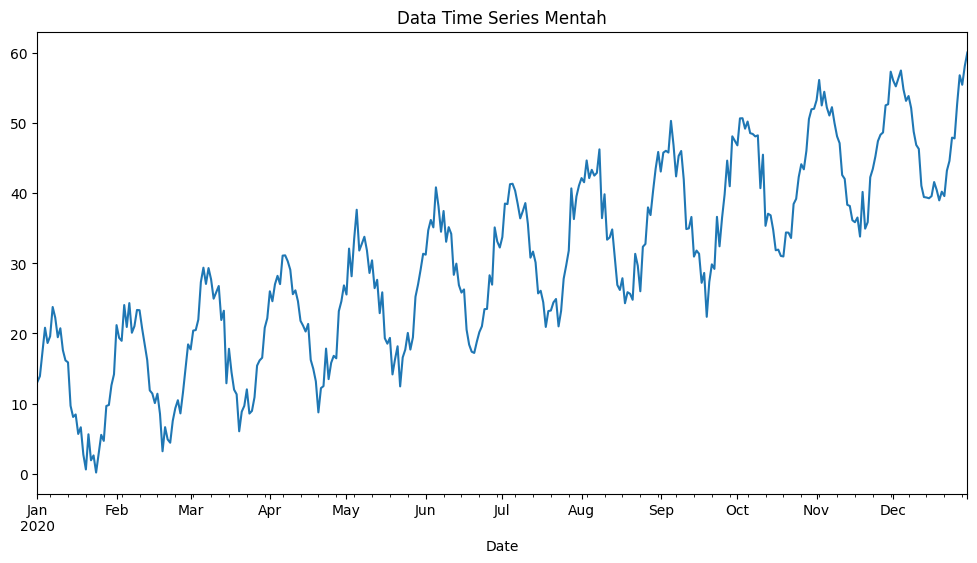

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# 1. Membuat data time series sintetis (Trend + Seasonality + Noise)
np.random.seed(42)
time = pd.date_range(start='2020-01-01', periods=365, freq='D')
trend = np.linspace(10, 50, 365)  # Data cenderung naik
seasonal = 10 * np.sin(2 * np.pi * time.dayofyear / 30)  # Pola bulanan
noise = np.random.normal(0, 2, 365)
data = trend + seasonal + noise

df = pd.DataFrame({'Date': time, 'Value': data})
df.set_index('Date', inplace=True)

# Visualisasi Data Mentah
df['Value'].plot(figsize=(12, 6), title='Data Time Series Mentah')
plt.show()

##Dekomposisi (Membedah Komponen)
Sebelum masuk ke rumus, Anda harus bisa membedah satu data Time Series menjadi 4 komponen (Decomposisi):

Trend (T): Kecenderungan data untuk naik atau turun dalam jangka panjang.

Seasonality (S): Pola yang berulang secara tetap dalam periode tertentu (misal: jualan es meningkat setiap jam makan siang atau setiap musim panas).

Cyclical (C): Fluktuasi ekonomi jangka panjang (seperti siklus resesi) yang tidak memiliki periode tetap.

Noise/Irregular (I): Kejadian acak yang tidak terduga.


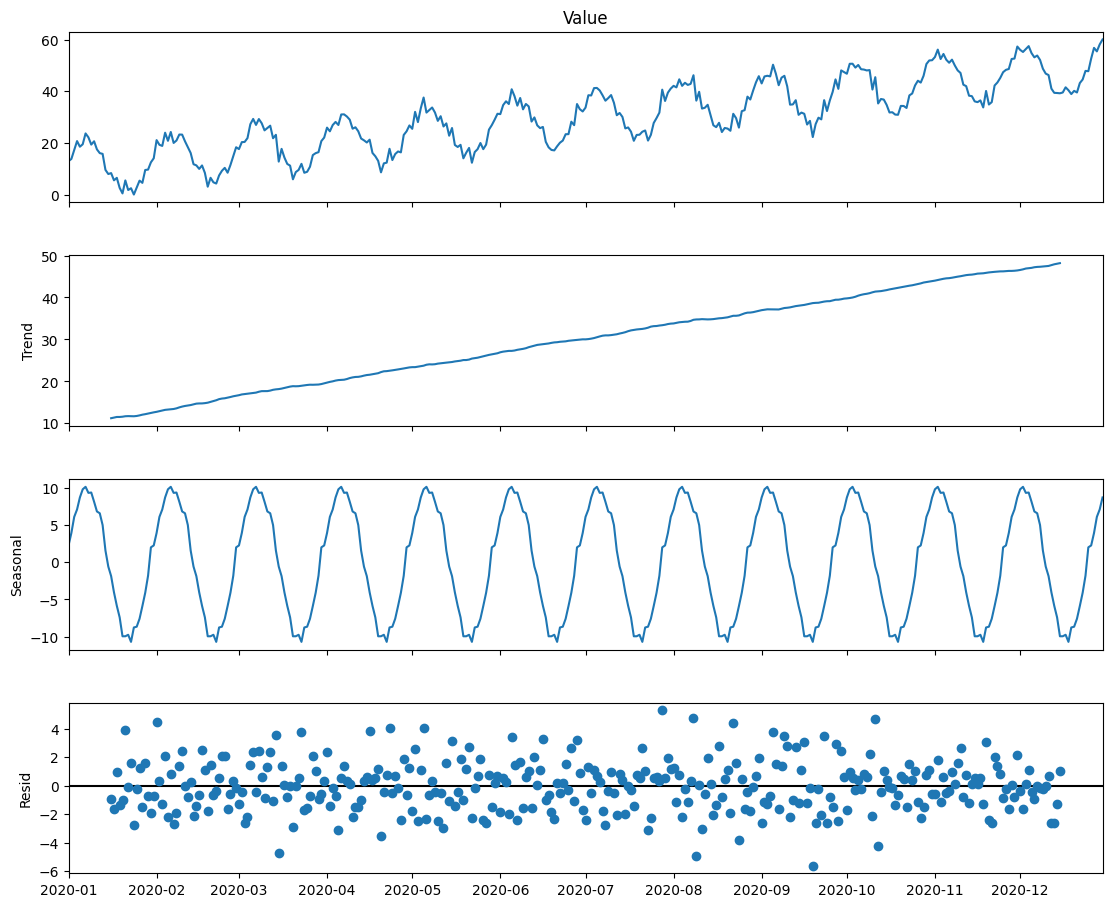

In [ ]:
# Dekomposisi Data (Model Additive karena komponennya dijumlahkan)
decomposition = seasonal_decompose(df['Value'], model='additive', period=30)

# Plot hasil dekomposisi
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

##Stasioneritas
Dalam Regresi Linear, kita berasumsi data kita "tenang". Di Time Series, syarat mutlaknya adalah data harus Stasioner.

Apa itu Stasioner? Data disebut stasioner jika Rata-rata (Mean) dan Varians-nya konstan dari waktu ke waktu.

Jika data Anda punya Trend (naik terus), data itu Tidak Stasioner.

Jika variansnya melebar (makin lama makin fluktuatif), data itu Tidak Stasioner.

Kenapa harus Stasioner? Karena jika rata-ratanya berubah terus, model statistik kita tidak bisa menangkap pola yang konsisten untuk memprediksi masa depan.

Kita akan menguji apakah data ini stasioner. Jika p-value > 0.05, data tidak stasioner (punya tren).

Uji ADF (Augmented Dickey-Fuller): Ini adalah tes kesehatan.

Jika p-value < 0.05, datanya "Sehat" (Stasioner) dan siap diolah model.

Jika p-value > 0.05, datanya "Masih Tumbuh" (Tidak Stasioner) dan perlu diperbaiki.

In [ ]:
def check_adfuller(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Kesimpulan: Data Stasioner (H0 Ditolak)")
    else:
        print("Kesimpulan: Data TIDAK Stasioner (H0 Diterima)")

check_adfuller(df['Value'])

ADF Statistic: -0.294191
p-value: 0.926323
Kesimpulan: Data TIDAK Stasioner (H0 Diterima)


##Differencing
Jika data Anda tidak stasioner (misal ada trend naik), kita gunakan teknik Differencing  ($d$). kita hitung selisihnya ( Yt−Yt−1 ) untuk menghilangkan tren.

$$\Delta Y_t = Y_t - Y_{t-1}$$

 Bukannya melihat "Berapa harganya hari ini?", kita melihat "Berapa selisihnya dibanding kemarin?".


Artinya, kita tidak memprediksi nilainya, tapi memprediksi selisihnya. Jika selisihnya sudah stabil, baru kita bisa masukkan ke model.

ADF Statistic: -12.008286
p-value: 0.000000
Kesimpulan: Data Stasioner (H0 Ditolak)


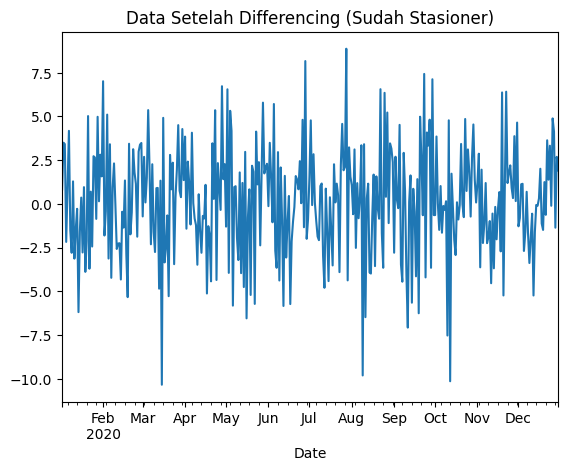

In [ ]:
# Melakukan Differencing orde 1
df_diff = df['Value'].diff().dropna()

# Cek lagi stasioneritasnya
check_adfuller(df_diff)

# Visualisasi data yang sudah di-diff
df_diff.plot(title='Data Setelah Differencing (Sudah Stasioner)')
plt.show()

##Mengenal Model ARIMA

ARIMA adalah singkatan dari tiga bagian:

AR (Autoregressive - $p$): Menggunakan hubungan antara pengamatan saat ini dengan pengamatan masa lalu.

$$Y_t = \phi_1 Y_{t-1} + \epsilon_t$$I

(Integrated - $d$): Jumlah proses differencing yang dibutuhkan agar data stasioner.

MA (Moving Average - $q$): Menggunakan hubungan antara pengamatan saat ini dengan error (kesalahan prediksi) di masa lalu.

$$Y_t = \theta_1 \epsilon_{t-1} + \epsilon_t$$


Model ini biasanya ditulis sebagai ARIMA(p, d, q).



Bagaimana kita tahu harus pakai $p=1$ atau $q=2$?

Kita menggunakan dua grafik diagnosa:
- ACF (Autocorrelation Function): Membantu menentukan nilai $q$ (MA). Melihat korelasi antara $Y_t$ dengan lag-lag sebelumnya secara keseluruhan.
- PACF (Partial Autocorrelation Function): Membantu menentukan nilai $p$ (AR). Melihat korelasi langsung antara $Y_t$ dengan lag tertentu tanpa pengaruh lag di antaranya.

Autokorelasi adalah cara kita bertanya: "Seberapa mirip hari ini dengan masa lalu?"

Lag 1: Apakah hari ini sangat dipengaruhi oleh hari kemarin?

Lag 7: Apakah hari Senin ini sangat mirip dengan hari Senin lalu?

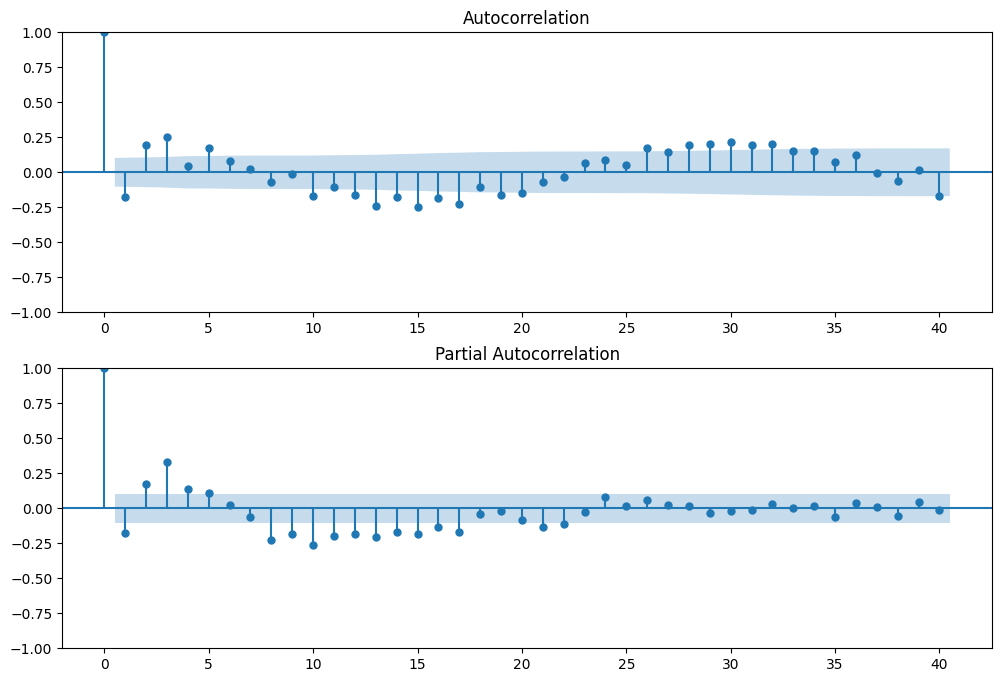

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_diff, lags=40, ax=ax1)  # Menentukan q (MA)
plot_pacf(df_diff, lags=40, ax=ax2) # Menentukan p (AR)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Menggunakan SARIMA karena ada pola musiman (seasonal) tiap 30 hari
# order=(p, d, q), seasonal_order=(P, D, Q, s)
model = SARIMAX(df['Value'],
                order=(1, 1, 1),
                seasonal_order=(1, 0, 0, 30))

model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                               Value   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 30)   Log Likelihood                -900.117
Date:                             Wed, 11 Feb 2026   AIC                           1808.235
Time:                                     13:20:04   BIC                           1823.824
Sample:                                 01-01-2020   HQIC                          1814.431
                                      - 12-30-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2578      0.121     -2.129      0.033      -0.495      -0.020
ma.L1         -0.2167      

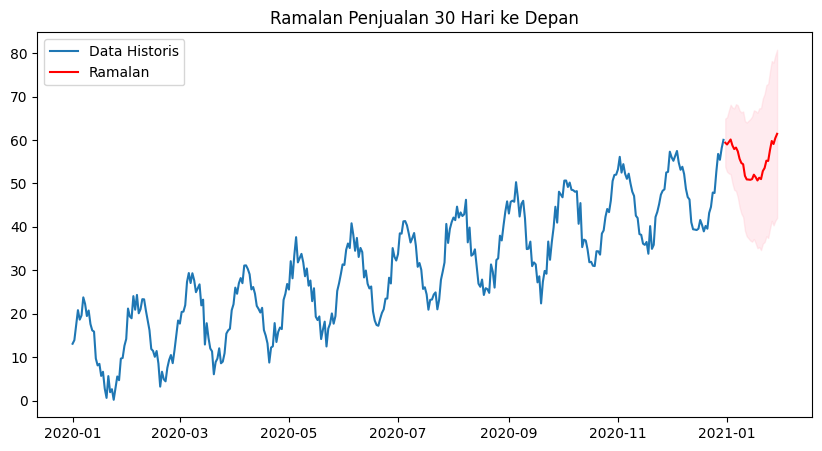

In [ ]:
# Forecast 30 hari ke depan
forecast = model_fit.get_forecast(steps=30)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot hasilnya
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Value'], label='Data Historis')
plt.plot(mean_forecast.index, mean_forecast, color='red', label='Ramalan')
plt.fill_between(mean_forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Ramalan Penjualan 30 Hari ke Depan')
plt.legend()
plt.show()